In [1]:
import sys
!{sys.executable} -m pip install pandas numpy scikit-learn matplotlib
!{sys.executable} -m pip install seaborn imbalanced-learn

# Import necessary libraries
import seaborn as sns  # This helps us make charts
import pandas as pd  # This helps us work with data tables
import numpy as np  # This helps us do math and handle numbers
import matplotlib.pyplot as plt  # This helps us make charts
from imblearn.over_sampling import SMOTE  # NEW: Import SMOTE to balance the data
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV  # These help split data and find best model settings
from sklearn.preprocessing import StandardScaler, LabelEncoder  # These adjust data for the model
from sklearn.linear_model import LogisticRegression  # This is a simple model to predict categories
from sklearn.tree import DecisionTreeClassifier  # This is a tree-based model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # These are advanced models with many trees
from sklearn.metrics import (  # These measure how good our model is
    confusion_matrix, classification_report, accuracy_score, 
    precision_score, recall_score, f1_score, log_loss, roc_auc_score
)
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier  # These help with multiple categories


Descriptive Statistics:
             Gender          Goal  BMI Category  Exercise Schedule  \
count  80000.000000  80000.000000  80000.000000        80000.00000   
mean       0.491500      0.512750      1.522500            1.49125   
std        0.499931      0.499841      1.127391            1.11532   
min        0.000000      0.000000      0.000000            0.00000   
25%        0.000000      0.000000      1.000000            1.00000   
50%        0.000000      1.000000      2.000000            1.00000   
75%        1.000000      1.000000      3.000000            2.00000   
max        1.000000      1.000000      3.000000            3.00000   

          Meal Plan  
count  80000.000000  
mean       1.488250  
std        1.115293  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        2.000000  
max        3.000000  


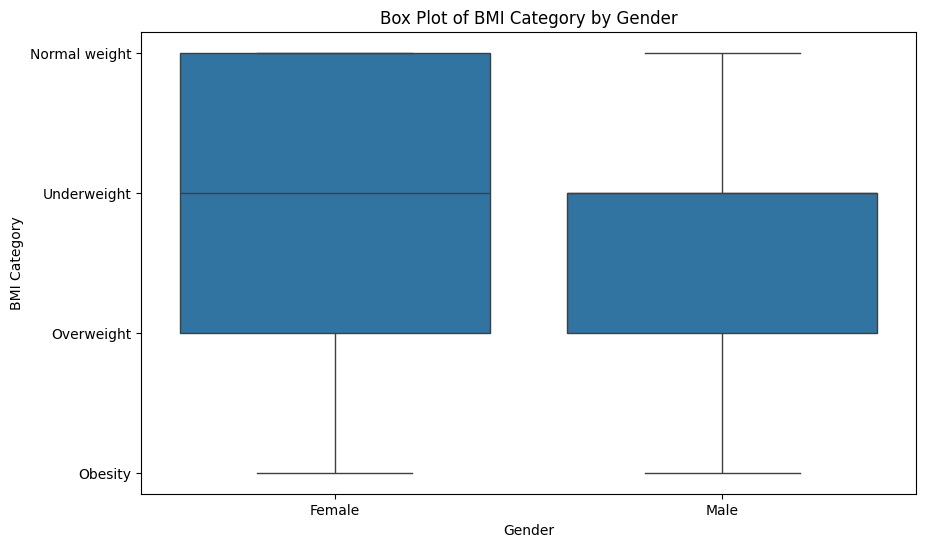

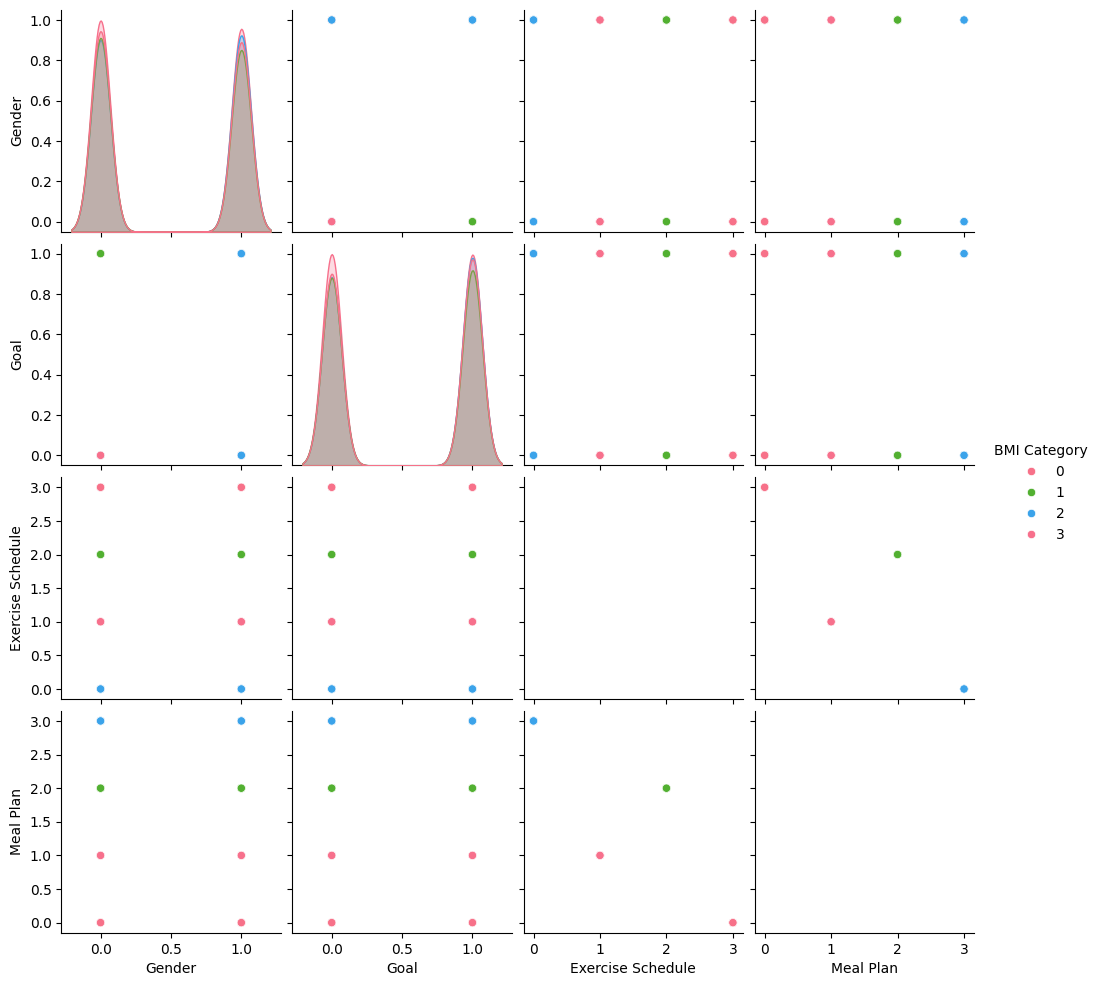

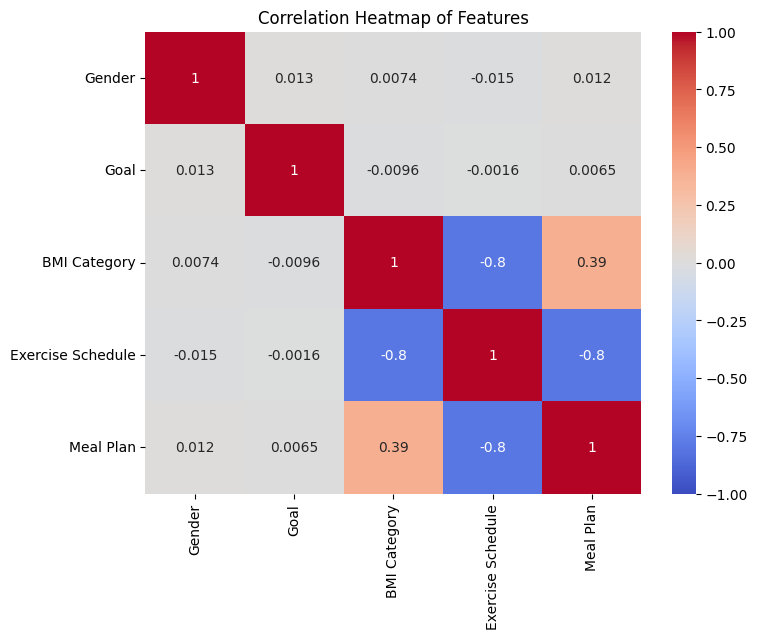


--- Models Without Balancing ---

Logistic Regression (OvR) (Unbalanced) Performance:
Confusion Matrix:
[[3984    0    0    0]
 [   0 3860    0    0]
 [   0    0 3968    0]
 [   0    0    0 4188]]

Classification Report:
               precision    recall  f1-score   support

Normal weight       1.00      1.00      1.00      3984
      Obesity       1.00      1.00      1.00      3860
   Overweight       1.00      1.00      1.00      3968
  Underweight       1.00      1.00      1.00      4188

     accuracy                           1.00     16000
    macro avg       1.00      1.00      1.00     16000
 weighted avg       1.00      1.00      1.00     16000

Log Loss: 0.001362743514094209
ROC AUC Score (OvR): 1.0


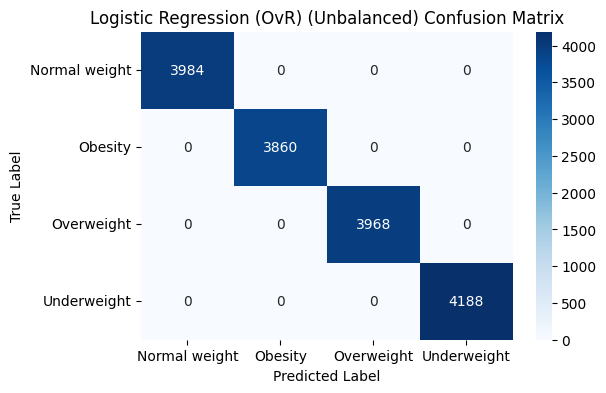


Logistic Regression (OvO) (Unbalanced) Performance:
Confusion Matrix:
[[3984    0    0    0]
 [   0 3860    0    0]
 [   0    0 3968    0]
 [   0    0    0 4188]]

Classification Report:
               precision    recall  f1-score   support

Normal weight       1.00      1.00      1.00      3984
      Obesity       1.00      1.00      1.00      3860
   Overweight       1.00      1.00      1.00      3968
  Underweight       1.00      1.00      1.00      4188

     accuracy                           1.00     16000
    macro avg       1.00      1.00      1.00     16000
 weighted avg       1.00      1.00      1.00     16000



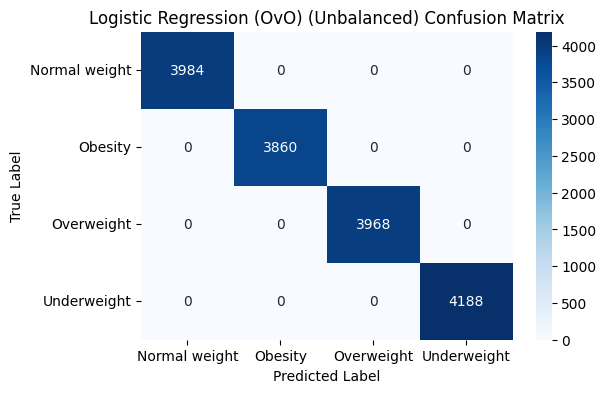

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Softmax Regression (Unbalanced) Performance:
Confusion Matrix:
[[3984    0    0    0]
 [   0 3860    0    0]
 [   0    0 3968    0]
 [   0    0    0 4188]]

Classification Report:
               precision    recall  f1-score   support

Normal weight       1.00      1.00      1.00      3984
      Obesity       1.00      1.00      1.00      3860
   Overweight       1.00      1.00      1.00      3968
  Underweight       1.00      1.00      1.00      4188

     accuracy                           1.00     16000
    macro avg       1.00      1.00      1.00     16000
 weighted avg       1.00      1.00      1.00     16000

Log Loss: 0.0006058581282229013
ROC AUC Score (OvR): 1.0


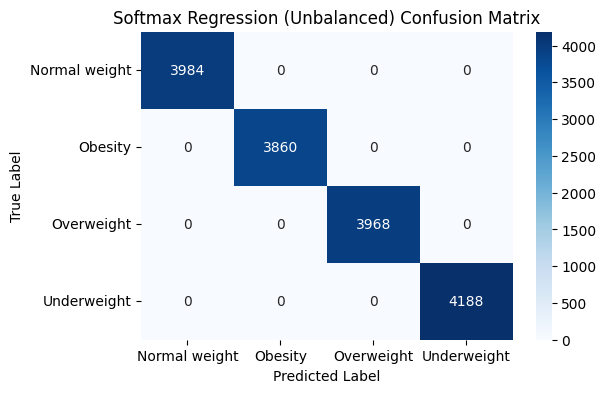


Decision Tree (Unbalanced) Performance:
Confusion Matrix:
[[3984    0    0    0]
 [   0 3860    0    0]
 [   0    0 3968    0]
 [   0    0    0 4188]]

Classification Report:
               precision    recall  f1-score   support

Normal weight       1.00      1.00      1.00      3984
      Obesity       1.00      1.00      1.00      3860
   Overweight       1.00      1.00      1.00      3968
  Underweight       1.00      1.00      1.00      4188

     accuracy                           1.00     16000
    macro avg       1.00      1.00      1.00     16000
 weighted avg       1.00      1.00      1.00     16000

Log Loss: 2.2204460492503136e-16
ROC AUC Score (OvR): 1.0


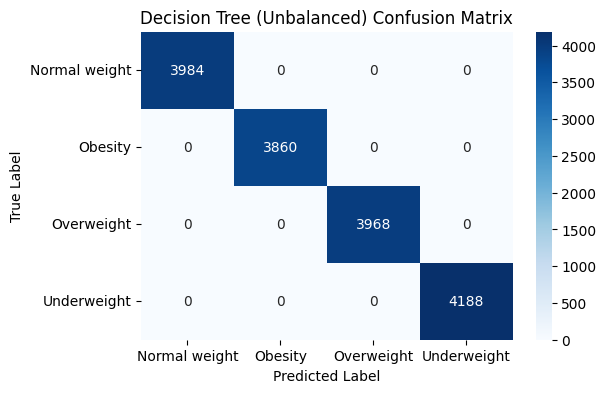


Random Forest (Unbalanced) Performance:
Confusion Matrix:
[[3984    0    0    0]
 [   0 3860    0    0]
 [   0    0 3968    0]
 [   0    0    0 4188]]

Classification Report:
               precision    recall  f1-score   support

Normal weight       1.00      1.00      1.00      3984
      Obesity       1.00      1.00      1.00      3860
   Overweight       1.00      1.00      1.00      3968
  Underweight       1.00      1.00      1.00      4188

     accuracy                           1.00     16000
    macro avg       1.00      1.00      1.00     16000
 weighted avg       1.00      1.00      1.00     16000

Log Loss: 2.2204460492503136e-16
ROC AUC Score (OvR): 1.0


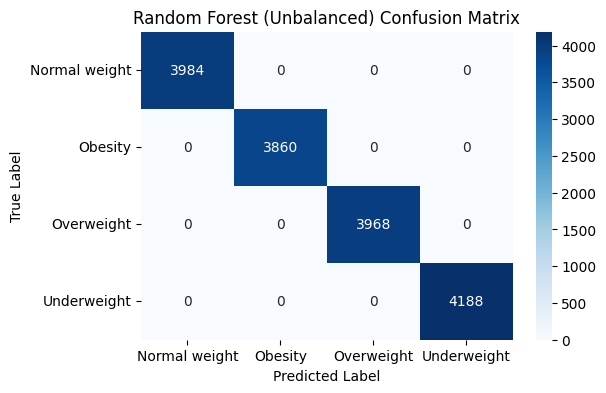


Gradient Boosting (Unbalanced) Performance:
Confusion Matrix:
[[3984    0    0    0]
 [   0 3860    0    0]
 [   0    0 3968    0]
 [   0    0    0 4188]]

Classification Report:
               precision    recall  f1-score   support

Normal weight       1.00      1.00      1.00      3984
      Obesity       1.00      1.00      1.00      3860
   Overweight       1.00      1.00      1.00      3968
  Underweight       1.00      1.00      1.00      4188

     accuracy                           1.00     16000
    macro avg       1.00      1.00      1.00     16000
 weighted avg       1.00      1.00      1.00     16000

Log Loss: 2.999246541310529e-07
ROC AUC Score (OvR): 1.0


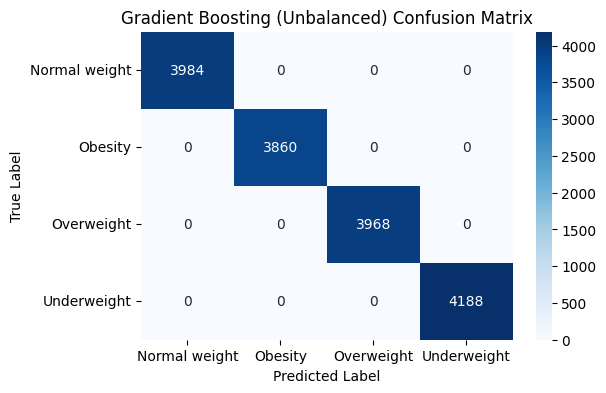


--- Models With SMOTE Balancing ---

Logistic Regression (OvR) (SMOTE Balanced) Performance:
Confusion Matrix:
[[3984    0    0    0]
 [   0 3860    0    0]
 [   0    0 3968    0]
 [   0    0    0 4188]]

Classification Report:
               precision    recall  f1-score   support

Normal weight       1.00      1.00      1.00      3984
      Obesity       1.00      1.00      1.00      3860
   Overweight       1.00      1.00      1.00      3968
  Underweight       1.00      1.00      1.00      4188

     accuracy                           1.00     16000
    macro avg       1.00      1.00      1.00     16000
 weighted avg       1.00      1.00      1.00     16000

Log Loss: 0.0013747656200449395
ROC AUC Score (OvR): 1.0


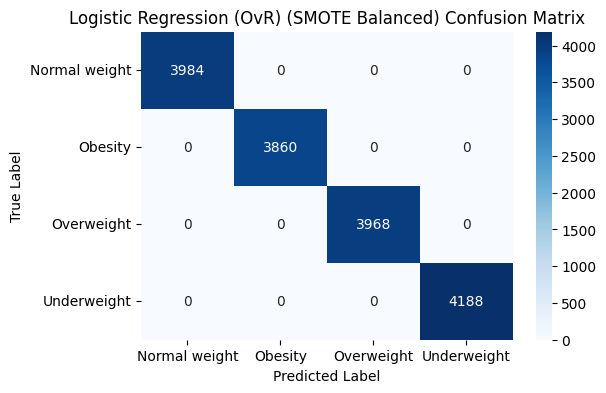


Logistic Regression (OvO) (SMOTE Balanced) Performance:
Confusion Matrix:
[[3984    0    0    0]
 [   0 3860    0    0]
 [   0    0 3968    0]
 [   0    0    0 4188]]

Classification Report:
               precision    recall  f1-score   support

Normal weight       1.00      1.00      1.00      3984
      Obesity       1.00      1.00      1.00      3860
   Overweight       1.00      1.00      1.00      3968
  Underweight       1.00      1.00      1.00      4188

     accuracy                           1.00     16000
    macro avg       1.00      1.00      1.00     16000
 weighted avg       1.00      1.00      1.00     16000



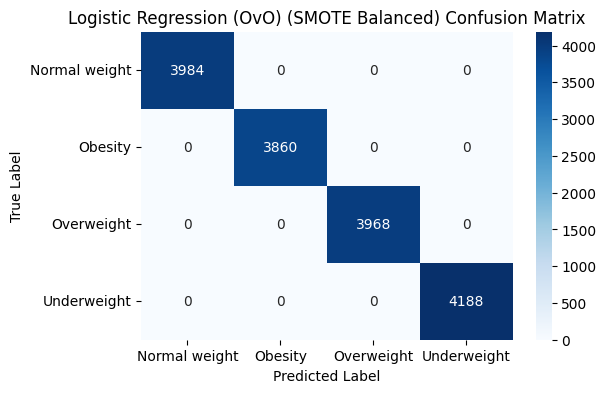

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Softmax Regression (SMOTE Balanced) Performance:
Confusion Matrix:
[[3984    0    0    0]
 [   0 3860    0    0]
 [   0    0 3968    0]
 [   0    0    0 4188]]

Classification Report:
               precision    recall  f1-score   support

Normal weight       1.00      1.00      1.00      3984
      Obesity       1.00      1.00      1.00      3860
   Overweight       1.00      1.00      1.00      3968
  Underweight       1.00      1.00      1.00      4188

     accuracy                           1.00     16000
    macro avg       1.00      1.00      1.00     16000
 weighted avg       1.00      1.00      1.00     16000

Log Loss: 0.0005942635099646243
ROC AUC Score (OvR): 1.0


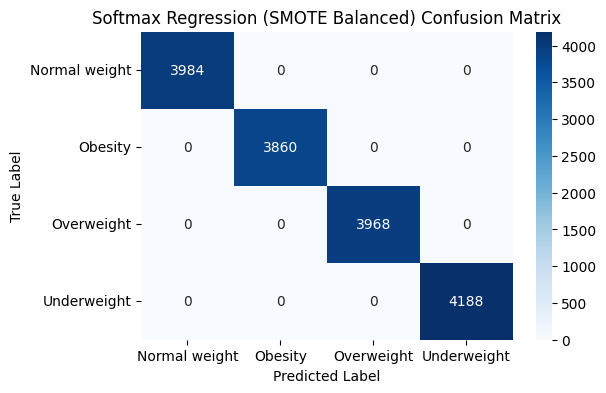


Decision Tree (SMOTE Balanced) Performance:
Confusion Matrix:
[[3984    0    0    0]
 [   0 3860    0    0]
 [   0    0 3968    0]
 [   0    0    0 4188]]

Classification Report:
               precision    recall  f1-score   support

Normal weight       1.00      1.00      1.00      3984
      Obesity       1.00      1.00      1.00      3860
   Overweight       1.00      1.00      1.00      3968
  Underweight       1.00      1.00      1.00      4188

     accuracy                           1.00     16000
    macro avg       1.00      1.00      1.00     16000
 weighted avg       1.00      1.00      1.00     16000

Log Loss: 2.2204460492503136e-16
ROC AUC Score (OvR): 1.0


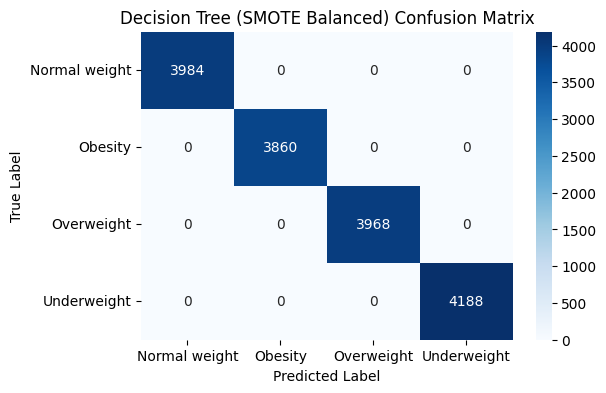


Random Forest (SMOTE Balanced) Performance:
Confusion Matrix:
[[3984    0    0    0]
 [   0 3860    0    0]
 [   0    0 3968    0]
 [   0    0    0 4188]]

Classification Report:
               precision    recall  f1-score   support

Normal weight       1.00      1.00      1.00      3984
      Obesity       1.00      1.00      1.00      3860
   Overweight       1.00      1.00      1.00      3968
  Underweight       1.00      1.00      1.00      4188

     accuracy                           1.00     16000
    macro avg       1.00      1.00      1.00     16000
 weighted avg       1.00      1.00      1.00     16000

Log Loss: 2.2204460492503136e-16
ROC AUC Score (OvR): 1.0


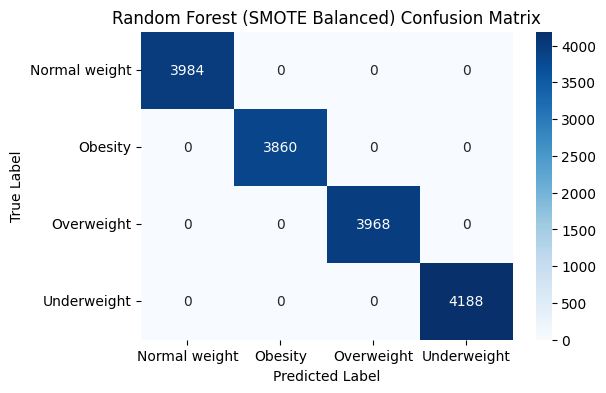


Gradient Boosting (SMOTE Balanced) Performance:
Confusion Matrix:
[[3984    0    0    0]
 [   0 3860    0    0]
 [   0    0 3968    0]
 [   0    0    0 4188]]

Classification Report:
               precision    recall  f1-score   support

Normal weight       1.00      1.00      1.00      3984
      Obesity       1.00      1.00      1.00      3860
   Overweight       1.00      1.00      1.00      3968
  Underweight       1.00      1.00      1.00      4188

     accuracy                           1.00     16000
    macro avg       1.00      1.00      1.00     16000
 weighted avg       1.00      1.00      1.00     16000

Log Loss: 3.000633398991369e-07
ROC AUC Score (OvR): 1.0


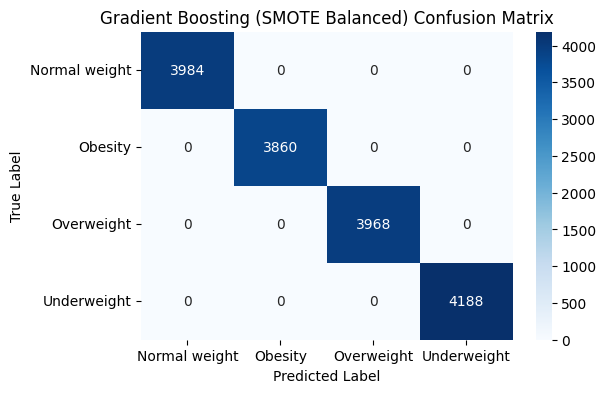

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Model Comparison:
                                         Model  Accuracy  Precision  Recall  \
0       Logistic Regression (OvR) (Unbalanced)       1.0        1.0     1.0   
1   Logistic Regression (OvR) (SMOTE Balanced)       1.0        1.0     1.0   
2       Logistic Regression (OvO) (Unbalanced)       1.0        1.0     1.0   
3   Logistic Regression (OvO) (SMOTE Balanced)       1.0        1.0     1.0   
4              Softmax Regression (Unbalanced)       1.0        1.0     1.0   
5          Softmax Regression (SMOTE Balanced)       1.0        1.0     1.0   
6                   Decision Tree (Unbalanced)       1.0        1.0     1.0   
7               Decision Tree (SMOTE Balanced)       1.0        1.0     1.0   
8                   Random Forest (Unbalanced)       1.0        1.0     1.0   
9               Random Forest (SMOTE Balanced)       1.0        1.0     1.0   
10              Gradient Boosting (Unbalanced)       1.0        1.0     1.0   
11          Gradient Boosting (SM

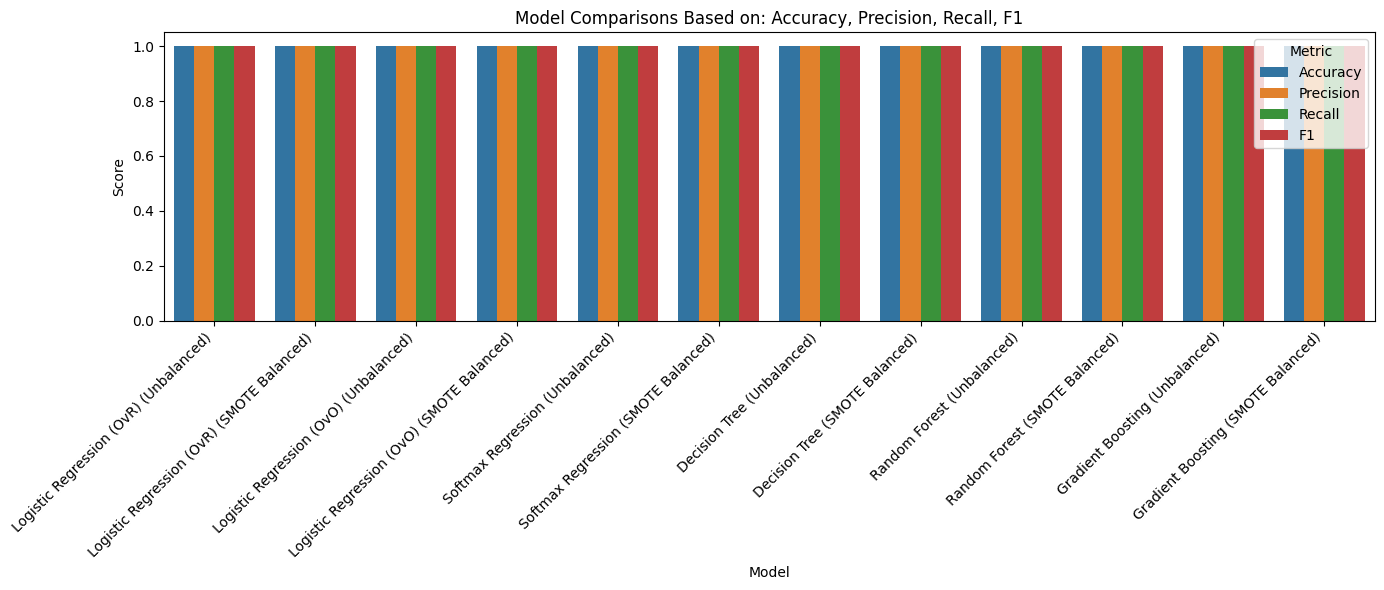


Predictions for New Data (Male, Female):
Male: Normal weight
Female: Overweight


In [2]:
# Load the dataset
df = pd.read_csv('GYM.csv')

# 1. Data Preprocessing
# Encode categorical variables
le_gender = LabelEncoder()
le_goal = LabelEncoder()
le_bmi = LabelEncoder()
le_exercise = LabelEncoder()
le_meal = LabelEncoder()

df['Gender'] = le_gender.fit_transform(df['Gender'])
df['Goal'] = le_goal.fit_transform(df['Goal'])
df['BMI Category'] = le_bmi.fit_transform(df['BMI Category'])
df['Exercise Schedule'] = le_exercise.fit_transform(df['Exercise Schedule'])
df['Meal Plan'] = le_meal.fit_transform(df['Meal Plan'])

# Features and target
X = df[['Gender', 'Goal', 'Exercise Schedule', 'Meal Plan']]
y = df['BMI Category']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# 2. Descriptive and Exploratory Data Analysis
# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Box Plot for BMI Category by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x=le_gender.inverse_transform(df['Gender']), y=le_bmi.inverse_transform(df['BMI Category']), data=df)
plt.title("Box Plot of BMI Category by Gender")
plt.xlabel("Gender")
plt.ylabel("BMI Category")
plt.show()

# Pair Plot for Feature Relationships
sns.pairplot(df, hue='BMI Category', palette='husl')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Features")
plt.show()

# 3. Define Evaluation Function
def evaluate_model(y_true, y_pred, y_proba=None, model_name="Model"):
    print(f"\n{model_name} Performance:")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=le_bmi.classes_))
    if y_proba is not None:
        print("Log Loss:", log_loss(y_true, y_proba))
        print("ROC AUC Score (OvR):", roc_auc_score(y_true, y_proba, multi_class='ovr'))
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_bmi.classes_, yticklabels=le_bmi.classes_)
    plt.title(f"{model_name} Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

# 4. Define Models
models = {
    'Logistic Regression (OvR)': OneVsRestClassifier(LogisticRegression(max_iter=10000)),
    'Logistic Regression (OvO)': OneVsOneClassifier(LogisticRegression()),
    'Softmax Regression': LogisticRegression(multi_class='multinomial', solver='lbfgs'),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate models without balancing
print("\n--- Models Without Balancing ---")
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = None if name == 'Logistic Regression (OvO)' else model.predict_proba(X_test_scaled)
    evaluate_model(y_test, y_pred, y_proba, f"{name} (Unbalanced)")

# Train and evaluate models with SMOTE balancing
print("\n--- Models With SMOTE Balancing ---")
for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_test_scaled)
    y_proba = None if name == 'Logistic Regression (OvO)' else model.predict_proba(X_test_scaled)
    evaluate_model(y_test, y_pred, y_proba, f"{name} (SMOTE Balanced)")

# 5. Model Comparison
metrics = []
for name, model in models.items():
    # Unbalanced
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = None if name == 'Logistic Regression (OvO)' else model.predict_proba(X_test_scaled)
    metrics.append({
        'Model': f"{name} (Unbalanced)",
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1': f1_score(y_test, y_pred, average='weighted'),
        'Log Loss': 'Not Available' if y_proba is None else log_loss(y_test, y_proba),
        'ROC AUC (OvR)': 'Not Available' if y_proba is None else roc_auc_score(y_test, y_proba, multi_class='ovr')
    })
    # SMOTE Balanced
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_test_scaled)
    y_proba = None if name == 'Logistic Regression (OvO)' else model.predict_proba(X_test_scaled)
    metrics.append({
        'Model': f"{name} (SMOTE Balanced)",
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1': f1_score(y_test, y_pred, average='weighted'),
        'Log Loss': 'Not Available' if y_proba is None else log_loss(y_test, y_proba),
        'ROC AUC (OvR)': 'Not Available' if y_proba is None else roc_auc_score(y_test, y_proba, multi_class='ovr')
    })

# Create comparison table
metrics_df = pd.DataFrame(metrics)
print("\nModel Comparison:")
print(metrics_df)

# Visualize Model Comparison
metrics_melted = metrics_df.melt(id_vars='Model', value_vars=['Accuracy', 'Precision', 'Recall', 'F1'], var_name='Metric', value_name='Score')
plt.figure(figsize=(14, 6))
sns.barplot(data=metrics_melted, x='Model', y='Score', hue='Metric')
plt.xticks(rotation=45, ha='right')
plt.title('Model Comparisons Based on: Accuracy, Precision, Recall, F1')
plt.tight_layout()
plt.show()

# 6. Predict for New Data (Example for Male and Female)
new_data = pd.DataFrame({
    'Gender': ['Male', 'Female'],
    'Goal': ['muscle_gain', 'fat_burn'],
    'Exercise Schedule': ['Moderate cardio, Strength training, and 5000 steps walking', 'High-intensity interval training (HIIT), Cardio, and 8000 steps walking'],
    'Meal Plan': ['Balanced diet with moderate protein and carbohydrates: Chicken breast, brown rice, spinach, eggs, apple', 'Low-carb, high-fiber diet: Avocado, grilled fish, broccoli, almonds, leafy greens']
})

# Encode new data
new_data['Gender'] = le_gender.transform(new_data['Gender'])
new_data['Goal'] = le_goal.transform(new_data['Goal'])
new_data['Exercise Schedule'] = le_exercise.transform(new_data['Exercise Schedule'])
new_data['Meal Plan'] = le_meal.transform(new_data['Meal Plan'])

# Scale new data
new_data_scaled = scaler.transform(new_data)

# Predict with best model (Random Forest SMOTE Balanced)
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train_balanced, y_train_balanced)
predictions = best_model.predict(new_data_scaled)
print("\nPredictions for New Data (Male, Female):")
for i, pred in enumerate(predictions):
    print(f"{le_gender.inverse_transform([new_data['Gender'].iloc[i]])[0]}: {le_bmi.inverse_transform([pred])[0]}")